In [1]:
import torch
import numpy as np
import os

In [2]:
folder_path = "imagenet_code_c2i_flip_ten_crop/imagenet256_codes"


In [17]:
labels_path = "imagenet_code_c2i_flip_ten_crop/imagenet256_labels"

In [23]:
from collections import defaultdict

def build_class_tokens_dict(tokens_dir, labels_dir):
    # defaultdict 用来自动创建空列表
    class_tokens = defaultdict(list)
    
    # 遍历 tokens 文件夹
    for fname in os.listdir(tokens_dir):
        if not fname.endswith(".npy"):
            continue
        
        token_path = os.path.join(tokens_dir, fname)
        label_path = os.path.join(labels_dir, fname)
        
        # 加载 tokens 和 label
        tokens = np.load(token_path)
        label = np.load(label_path).item()  # 假设 label.npy 里就是一个 int
        
        # 存入字典
        class_tokens[label].append(tokens)
    
    return dict(class_tokens)


In [24]:
class_tokens_dict = build_class_tokens_dict(folder_path, labels_path)

In [25]:
for cls_id, token_list in class_tokens_dict.items():
    print(f"类别 {cls_id}: {len(token_list)} 个样本")

类别 218: 1300 个样本
类别 826: 1084 个样本
类别 352: 1300 个样本
类别 339: 1300 个样本
类别 560: 1300 个样本
类别 362: 1300 个样本
类别 827: 1300 个样本
类别 571: 1300 个样本
类别 578: 1300 个样本
类别 702: 1300 个样本
类别 894: 1300 个样本
类别 172: 1300 个样本
类别 954: 1300 个样本
类别 254: 1300 个样本
类别 393: 1300 个样本
类别 376: 1300 个样本
类别 106: 1300 个样本
类别 687: 1300 个样本
类别 647: 1300 个样本
类别 900: 1300 个样本
类别 256: 1300 个样本
类别 561: 1300 个样本
类别 101: 1300 个样本
类别 825: 1300 个样本
类别 524: 1300 个样本
类别 97: 1300 个样本
类别 666: 1300 个样本
类别 874: 1300 个样本
类别 421: 1300 个样本
类别 955: 1300 个样本
类别 403: 1300 个样本
类别 234: 1300 个样本
类别 787: 1300 个样本
类别 790: 1300 个样本
类别 340: 1300 个样本
类别 857: 976 个样本
类别 122: 1300 个样本
类别 108: 1300 个样本
类别 798: 1162 个样本
类别 553: 1300 个样本
类别 768: 1300 个样本
类别 7: 1300 个样本
类别 953: 1300 个样本
类别 266: 1300 个样本
类别 852: 1300 个样本
类别 208: 1300 个样本
类别 135: 1300 个样本
类别 794: 1300 个样本
类别 608: 1300 个样本
类别 504: 1300 个样本
类别 587: 1300 个样本
类别 939: 1300 个样本
类别 473: 1300 个样本
类别 674: 1300 个样本
类别 672: 1300 个样本
类别 691: 1300 个样本
类别 788: 1300 个样本
类别 455: 1300 个样本
类别 204: 1300 个样本
类

In [26]:
def compute_token_probs(class_tokens_dict, vocab_size=16384):
    class_token_probs = {}
    
    for cls_id, token_list in class_tokens_dict.items():
        # 初始化频数
        counts = np.zeros(vocab_size, dtype=np.int64)
        
        # 累加该类别所有样本的 token 频数
        for tokens in token_list:
            counts += np.bincount(tokens.flatten(), minlength=vocab_size)
        
        # 转成概率
        probs = counts / counts.sum()
        
        class_token_probs[cls_id] = probs
    
    return class_token_probs

In [27]:
class_token_probs = compute_token_probs(class_tokens_dict)

# 打印每个类别的分布情况
for cls_id, probs in class_token_probs.items():
    print(f"类别 {cls_id}: token 分布 shape = {probs.shape}, sum = {probs.sum():.4f}")

类别 218: token 分布 shape = (16384,), sum = 1.0000
类别 826: token 分布 shape = (16384,), sum = 1.0000
类别 352: token 分布 shape = (16384,), sum = 1.0000
类别 339: token 分布 shape = (16384,), sum = 1.0000
类别 560: token 分布 shape = (16384,), sum = 1.0000
类别 362: token 分布 shape = (16384,), sum = 1.0000
类别 827: token 分布 shape = (16384,), sum = 1.0000
类别 571: token 分布 shape = (16384,), sum = 1.0000
类别 578: token 分布 shape = (16384,), sum = 1.0000
类别 702: token 分布 shape = (16384,), sum = 1.0000
类别 894: token 分布 shape = (16384,), sum = 1.0000
类别 172: token 分布 shape = (16384,), sum = 1.0000
类别 954: token 分布 shape = (16384,), sum = 1.0000
类别 254: token 分布 shape = (16384,), sum = 1.0000
类别 393: token 分布 shape = (16384,), sum = 1.0000
类别 376: token 分布 shape = (16384,), sum = 1.0000
类别 106: token 分布 shape = (16384,), sum = 1.0000
类别 687: token 分布 shape = (16384,), sum = 1.0000
类别 647: token 分布 shape = (16384,), sum = 1.0000
类别 900: token 分布 shape = (16384,), sum = 1.0000
类别 256: token 分布 shape = (16384,), sum =

In [1]:
import numpy as np
count = np.load('class_token_probs.npy')

freq_counts = count[0]

for i in range(freq_counts.shape[0]):
    frequencies = freq_counts[i, :]
    top5_ids = np.argsort(frequencies)[-5:][::-1]
    print("position",i,"frequencies top5:" , top5_ids)

position 0 frequencies top5: [2580 2300  510 1388 2399]
position 1 frequencies top5: [7855 2580 3521 3784 6205]
position 2 frequencies top5: [2580 7855 6205 3521 2399]
position 3 frequencies top5: [7855 2580 6205 3784  826]
position 4 frequencies top5: [7855 6205 2580 2399 5195]
position 5 frequencies top5: [7855 6205 3784 3521 2580]
position 6 frequencies top5: [ 7855  6205  2580 10578 10090]
position 7 frequencies top5: [3784 6205 2580  218 3680]
position 8 frequencies top5: [6205 7855 3784  218 2055]
position 9 frequencies top5: [6205 7855 5828  218 1907]
position 10 frequencies top5: [7855 6205 2580 3784 2399]
position 11 frequencies top5: [7855 6205 2580 2399 1907]
position 12 frequencies top5: [2580 7855 6205 3521  218]
position 13 frequencies top5: [2580 7855 2399 6205 1907]
position 14 frequencies top5: [2580 1907 8308 2399 1388]
position 15 frequencies top5: [6205  307 1085 1278 3049]
position 16 frequencies top5: [4702  218  514  114 1653]
position 17 frequencies top5: [ 114 

In [2]:
freq_counts = count[100]

for i in range(freq_counts.shape[0]):
    frequencies = freq_counts[i, :]
    top5_ids = np.argsort(frequencies)[-5:][::-1]
    print("position",i,"frequencies top5:" , top5_ids)

position 0 frequencies top5: [ 3901  8435 11850 15082  5378]
position 1 frequencies top5: [14108 10667  3188 12149  1060]
position 2 frequencies top5: [ 5740 11655 14353 10188  6445]
position 3 frequencies top5: [ 2000  3715 14369 12514 11522]
position 4 frequencies top5: [ 7216 12940   182  5173  5740]
position 5 frequencies top5: [5740 2564  685 9668 6886]
position 6 frequencies top5: [2930 2000 5360 2599 6298]
position 7 frequencies top5: [ 5586  5113 13769  5565  7435]
position 8 frequencies top5: [ 5740 14991  1539 15177  1803]
position 9 frequencies top5: [5740  787 2163 5000 3826]
position 10 frequencies top5: [3532 1512 7775 8306 5740]
position 11 frequencies top5: [ 9687 10667    93  3799  5740]
position 12 frequencies top5: [ 9131  6833  7137 12149 14879]
position 13 frequencies top5: [6633 6833 1482 5740 3173]
position 14 frequencies top5: [14146  1485  6886  2564  6935]
position 15 frequencies top5: [14957 15067 13515  6474  2000]
position 16 frequencies top5: [ 2892 13841 

In [ ]:
import json

def save_probs_to_json(class_token_probs, save_path="class_token_probs.json"):
    # 把 ndarray 转成 list
    serializable_dict = {int(cls_id): probs.tolist() 
                         for cls_id, probs in class_token_probs.items()}
    
    # 保存成 JSON 文件
    with open(save_path, "w") as f:
        json.dump(serializable_dict, f)
    
    print(f"已保存到 {save_path}")
    

# 用法
save_probs_to_json(class_token_probs, "class_token_probs.json")

已保存到 class_token_probs.json


In [13]:
label = np.load(labels_path)
print(label)

[998]


In [3]:
data_list = []
for root, dirs, files in os.walk(folder_path):
    for file in files:
        # 检查文件扩展名是否为 .npy
        if file.endswith('.npy'):
            # 构建完整的 .npy 文件路径
            file_path = os.path.join(root, file)
            
            # 加载 .npy 文件
            try:
                # np.load() 会返回一个 NumPy 数组
                arr = np.load(file_path)
                
                # 假设每个文件都包含一个 (1, 10, 256) 的数组
                # 我们需要将其重塑为 (10, 256)
                if arr.shape == (1, 10, 256):
                    # 将 (1, 10, 256) 重塑为 (10, 256)
                    reshaped_arr = arr.reshape(10, 256)
                    data_list.append(reshaped_arr)
                else:
                    print(f"警告：文件 {file_path} 的形状不符合预期 ({arr.shape})，已跳过。")
            except Exception as e:
                print(f"加载文件 {file_path} 时出错：{e}")


In [4]:
if not data_list:
    print("未找到任何符合条件的 .npy 文件或所有文件形状都不正确。")
else:
    # 沿着第一个轴（垂直方向）拼接所有数组
    # np.vstack() 会将所有 (10, 256) 的数组堆叠起来
    combined_data = np.vstack(data_list)
    
    # 打印最终数组的形状
    # 这里的 len = 文件数量 * 10
    print(f"所有数据已成功拼接，最终数组的形状为：{combined_data.shape}")

所有数据已成功拼接，最终数组的形状为：(12811680, 256)


In [5]:
num_tokens = 16384
# 定义每个样本的 token 数量（位置数）
num_positions = combined_data.shape[1]
freq_counts = np.zeros((num_positions, num_tokens), dtype=np.int32)
for i in range(num_positions):
    # 提取第 i 个位置的所有 token ID
    tokens_at_position = combined_data[:, i]
    
    # 使用 np.bincount() 统计频率
    # minlength=num_tokens 确保结果数组的长度为 16384，即使某些 ID 未出现
    counts = np.bincount(tokens_at_position, minlength=num_tokens)
    
    # 将结果存储到 freq_counts 数组中
    freq_counts[i, :] = counts

print(f"所有数据已成功整理，最终数组的形状为：{freq_counts.shape}")

所有数据已成功整理，最终数组的形状为：(256, 16384)


position 0 frequencies top5: [2300 5001 2580 1509  510]
position 1 frequencies top5: [7855  307 1190 2580  922]
position 2 frequencies top5: [2580 5001  307 7855 6205]
position 3 frequencies top5: [ 307 2580 7855 5001  922]
position 4 frequencies top5: [ 307 2580 7855 5001  922]
position 5 frequencies top5: [ 307 7855 2580 5001  922]
position 6 frequencies top5: [ 307 7855 2580 5001  922]
position 7 frequencies top5: [ 307 7855 2580 5001  922]
position 8 frequencies top5: [ 307 7855 2580 5001  922]
position 9 frequencies top5: [ 307 7855 2580 5001  922]
position 10 frequencies top5: [ 307 7855 2580 5001  922]
position 11 frequencies top5: [ 307 7855 2580 5001  922]
position 12 frequencies top5: [ 307 2580 5001 7855 6205]
position 13 frequencies top5: [2580 5001  307 7855 6205]
position 14 frequencies top5: [2580 5001  307 1388  922]
position 15 frequencies top5: [1190 5001  307 6205 1085]
position 16 frequencies top5: [2580 1388  307 1653 4702]
position 17 frequencies top5: [2580 7855 

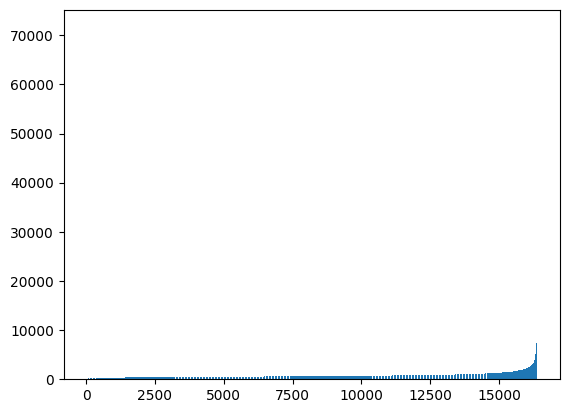

In [10]:
import matplotlib.pyplot as plt


frequencies = freq_counts[0, :]
token_ids = np.arange(len(frequencies))

#plt.figure(figsize=(20, 8)) # 设置图的大小
plt.bar(token_ids, sorted(frequencies))

for i in range(freq_counts.shape[0]):
    frequencies = freq_counts[i, :]
    top5_ids = np.argsort(frequencies)[-5:][::-1]
    print("position",i,"frequencies top5:" , top5_ids)

In [14]:
output_file = 'prior_counts.npy'

# 使用 np.save() 保存数组
np.save(output_file, freq_counts)

In [16]:
freq_counts = np.load(output_file)
tensor = torch.from_numpy(freq_counts)
print(tensor.shape)

torch.Size([256, 16384])
